## Telescopic Data Analysis

Link to the dataset:
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", 
        "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv("magic04.data", names=cols)

In [2]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'].unique() # g is gamma radiation falling on the telescope, h is hadron radiation

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class'] == 'g').astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


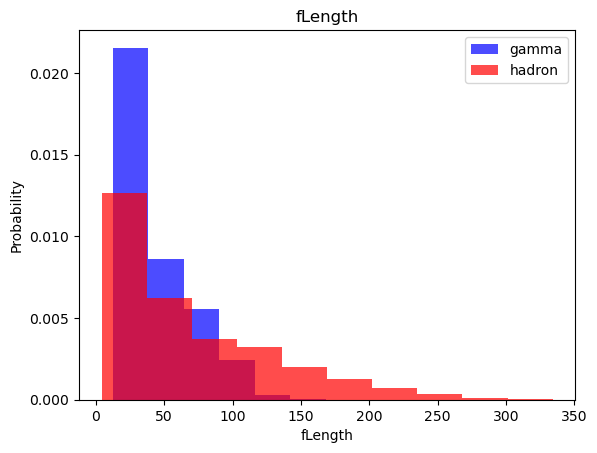

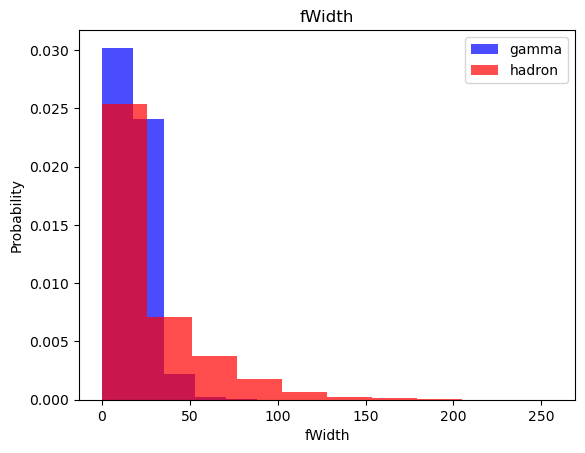

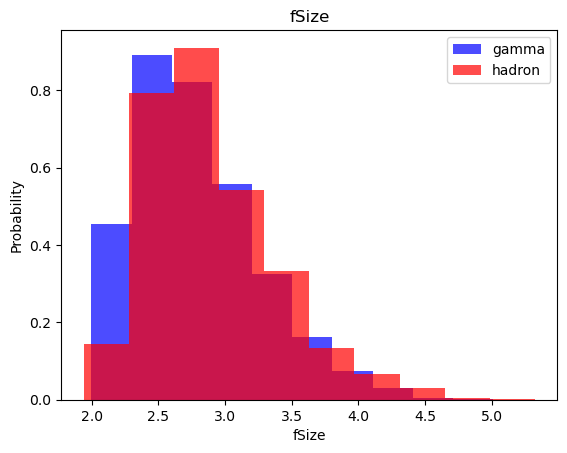

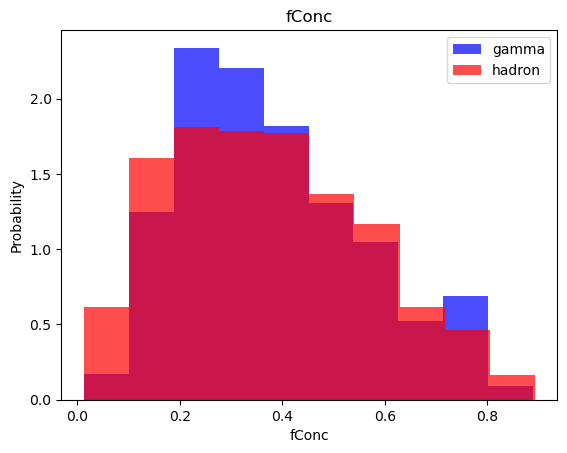

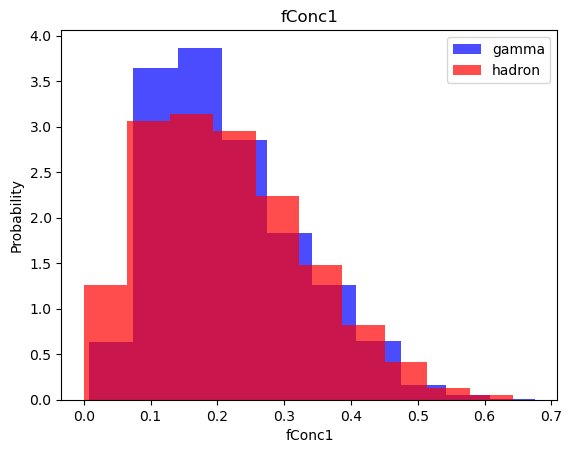

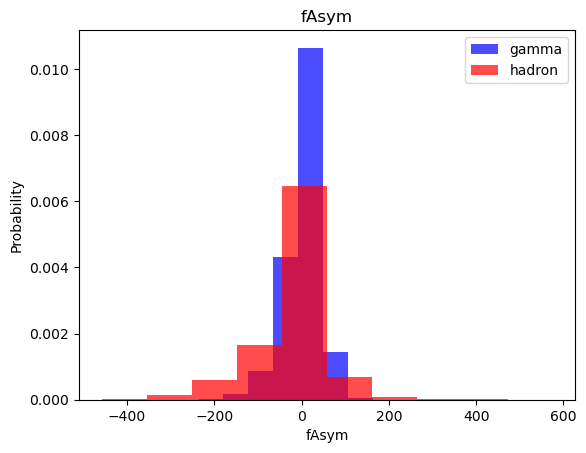

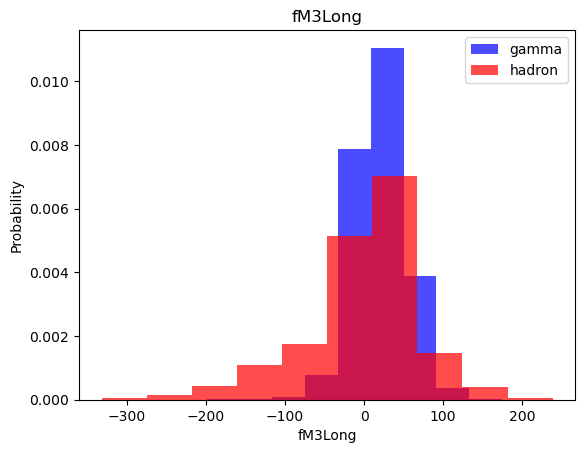

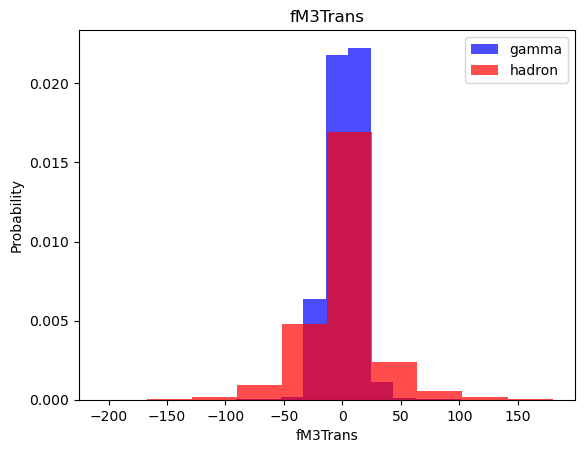

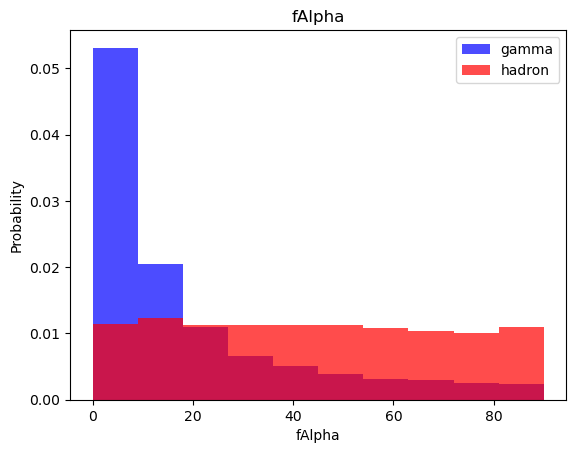

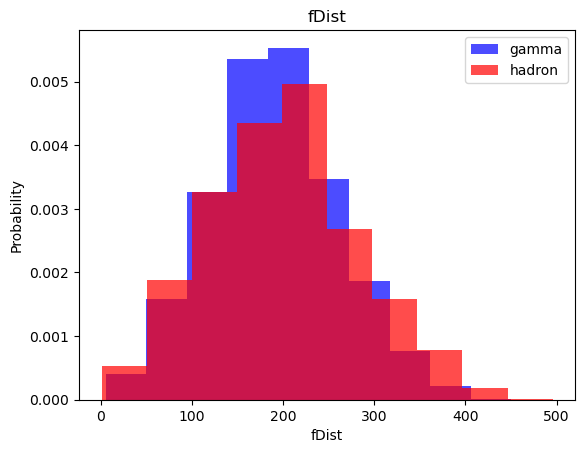

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train, valid and test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/johnadi/miniconda3/envs/telescope/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y 

In [9]:
print(len(train[train['class']==1])) # gammas
print(len(train[train['class']==0])) # hadrons

7397
4015


In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
len(y_train)

14794

In [12]:
sum(y_train == 1), sum(y_train == 0)

(7397, 7397)

### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1321
           1       0.86      0.86      0.86      2483

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51      1321
           1       0.74      0.89      0.81      2483

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [23]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1321
           1       0.85      0.82      0.83      2483

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



### SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [26]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1321
           1       0.90      0.89      0.89      2483

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Networks

In [27]:
import tensorflow as tf

2024-03-18 19:28:44.952244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', 
                    metrics=['accuracy'])
    
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history

In [29]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary CrossEntropy')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    plt.show()

32 nodes, dropout: 0, lr: 0.01, batch_size: 32


2024-03-18 19:28:46.543223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 19:28:46.543530: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


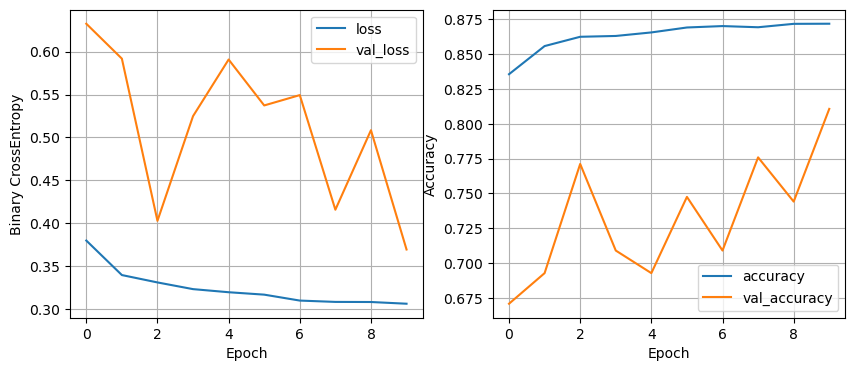

119/119 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8491
32 nodes, dropout: 0, lr: 0.01, batch_size: 64


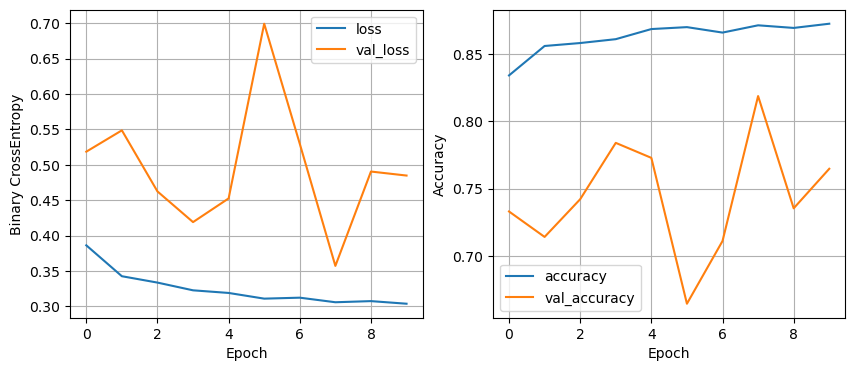

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8651
32 nodes, dropout: 0, lr: 0.005, batch_size: 32


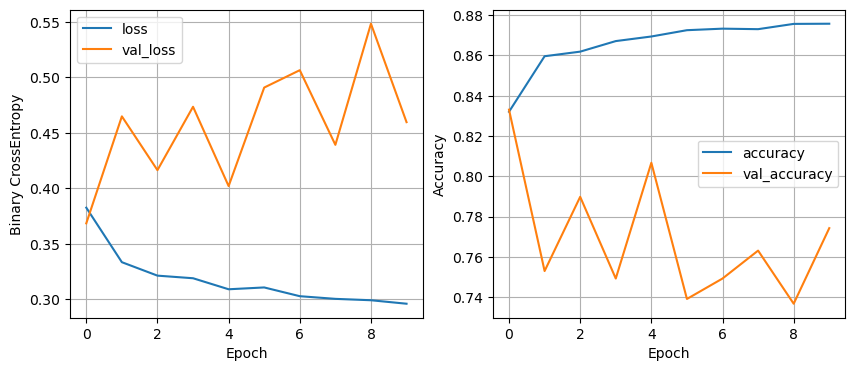

119/119 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8604
32 nodes, dropout: 0, lr: 0.005, batch_size: 64


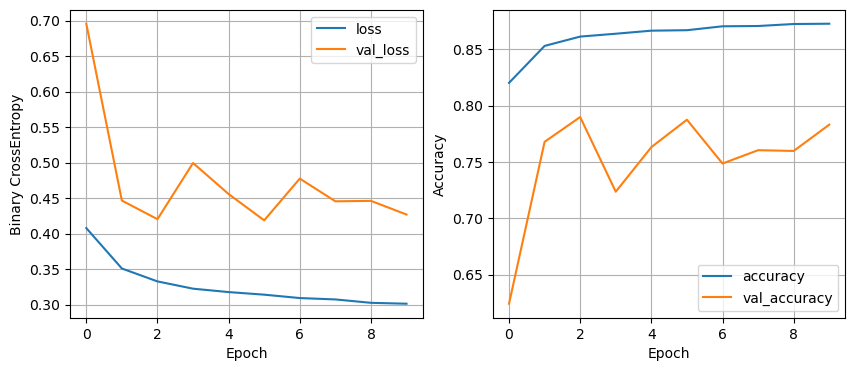

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8625
32 nodes, dropout: 0, lr: 0.001, batch_size: 32


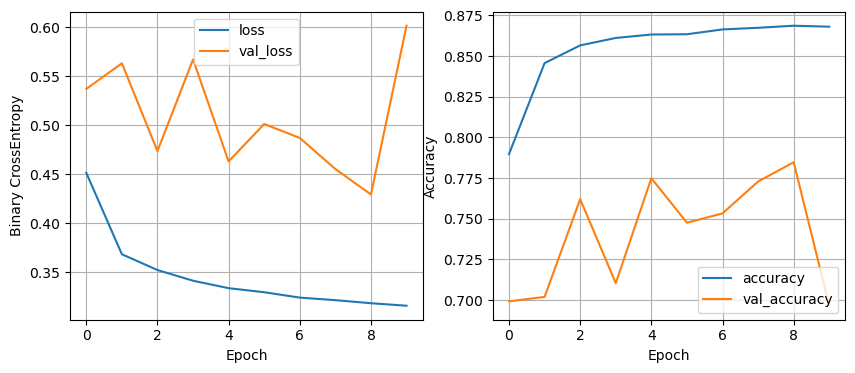

119/119 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8601
32 nodes, dropout: 0, lr: 0.001, batch_size: 64


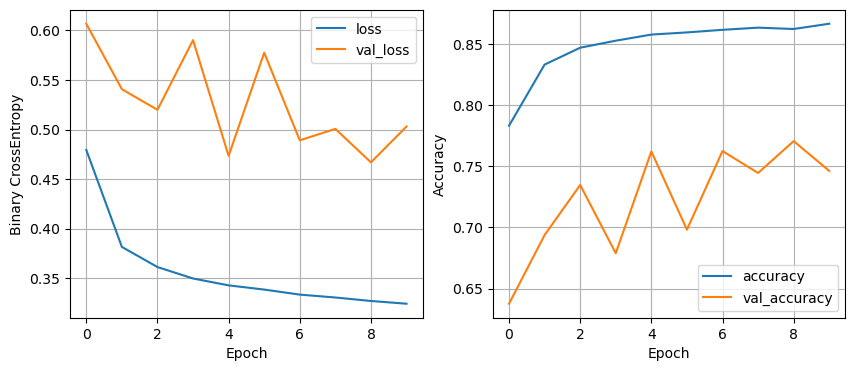

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8573
32 nodes, dropout: 0.2, lr: 0.01, batch_size: 32


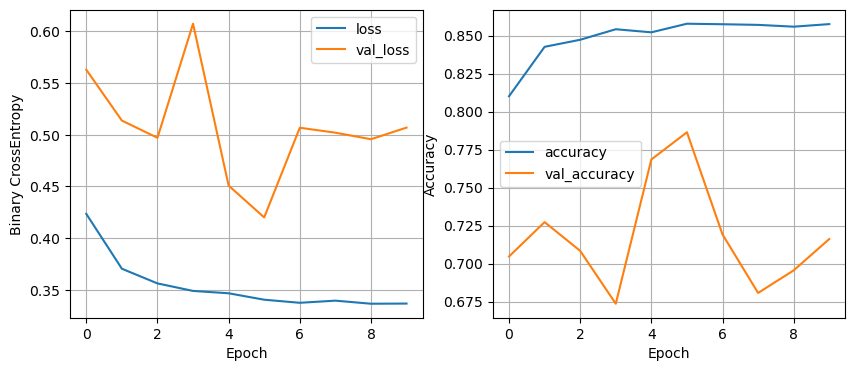

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8609
32 nodes, dropout: 0.2, lr: 0.01, batch_size: 64


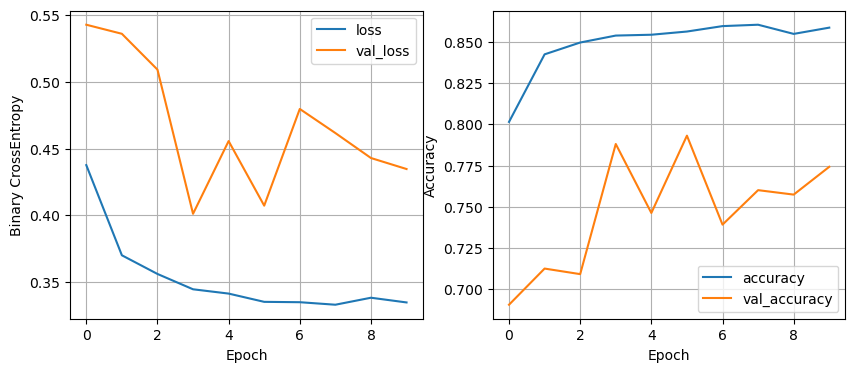

119/119 [==============================] - 1s 5ms/step - loss: 0.3322 - accuracy: 0.8552
32 nodes, dropout: 0.2, lr: 0.005, batch_size: 32


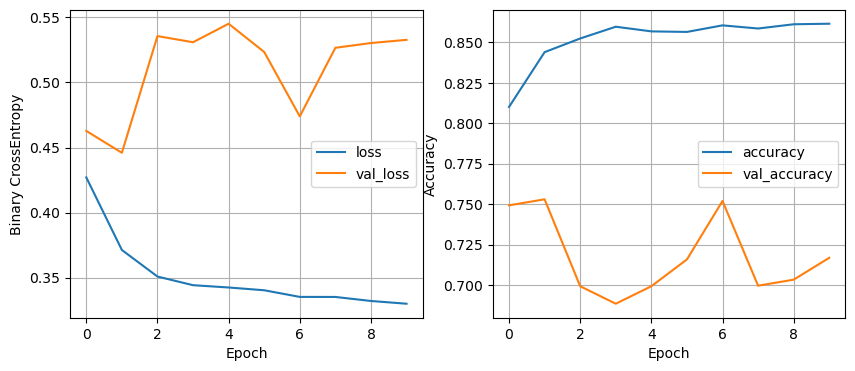

119/119 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8591
32 nodes, dropout: 0.2, lr: 0.005, batch_size: 64


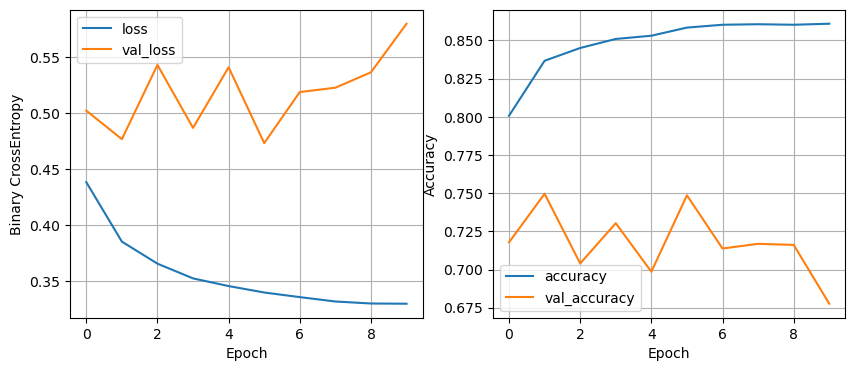

119/119 [==============================] - 1s 5ms/step - loss: 0.3301 - accuracy: 0.8630
32 nodes, dropout: 0.2, lr: 0.001, batch_size: 32


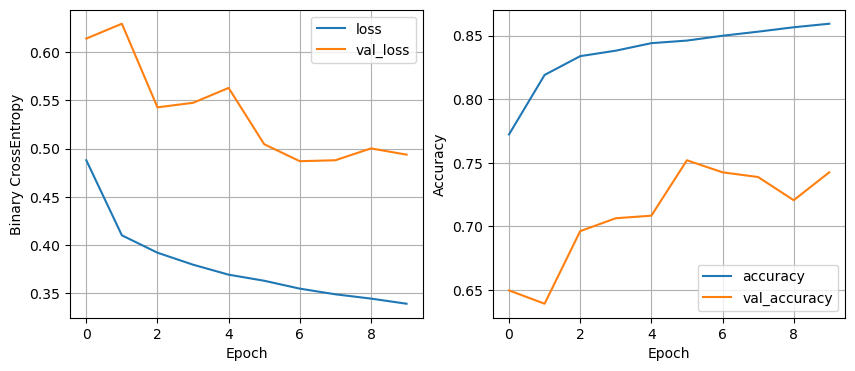

119/119 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8583
32 nodes, dropout: 0.2, lr: 0.001, batch_size: 64


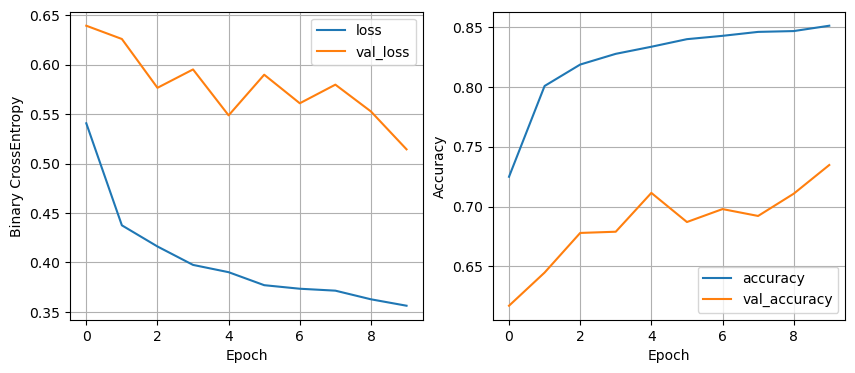

119/119 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8515
64 nodes, dropout: 0, lr: 0.01, batch_size: 32


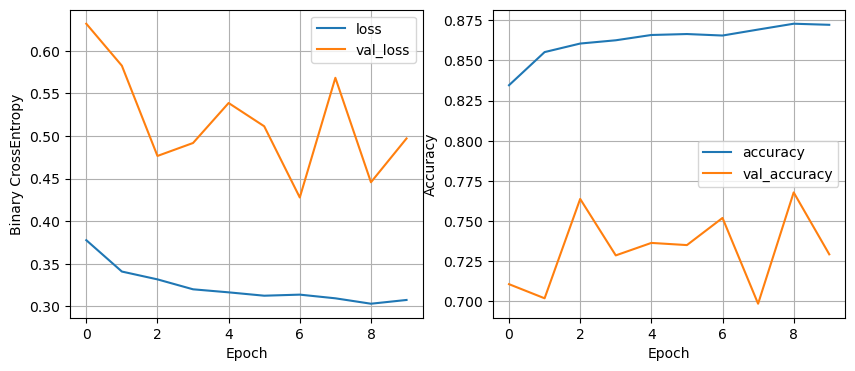

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8704
64 nodes, dropout: 0, lr: 0.01, batch_size: 64


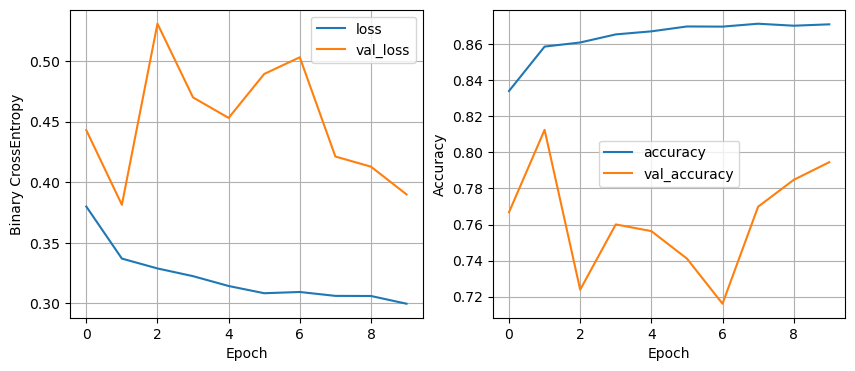

119/119 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8630
64 nodes, dropout: 0, lr: 0.005, batch_size: 32


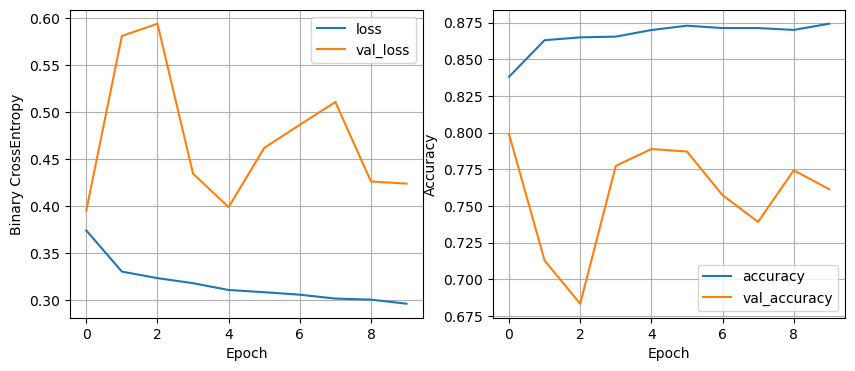

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8678
64 nodes, dropout: 0, lr: 0.005, batch_size: 64


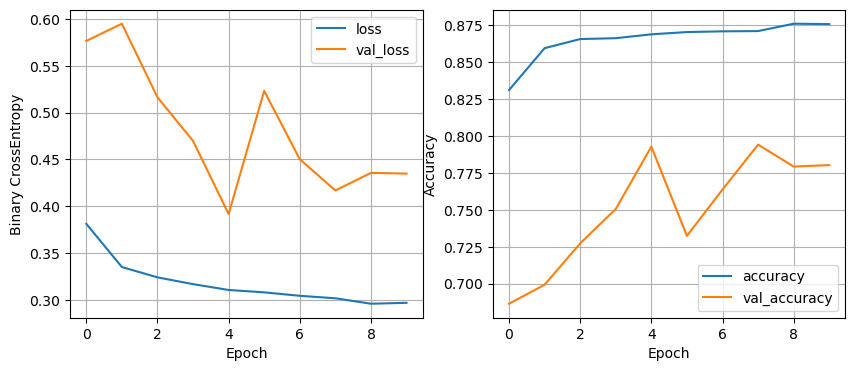

119/119 [==============================] - 1s 5ms/step - loss: 0.3244 - accuracy: 0.8617
64 nodes, dropout: 0, lr: 0.001, batch_size: 32


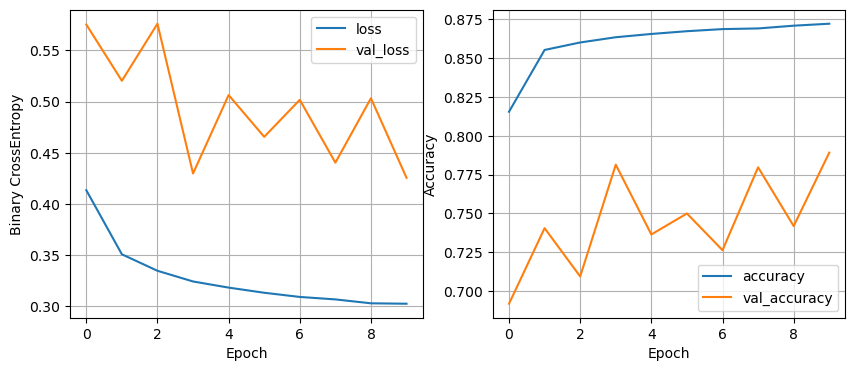

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8615
64 nodes, dropout: 0, lr: 0.001, batch_size: 64


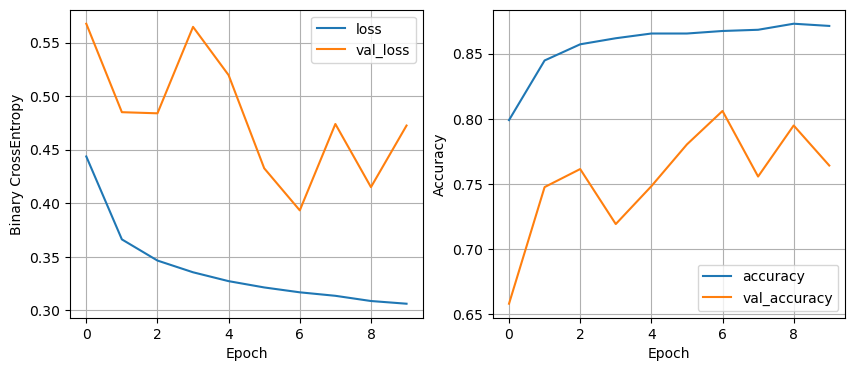

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8609
64 nodes, dropout: 0.2, lr: 0.01, batch_size: 32


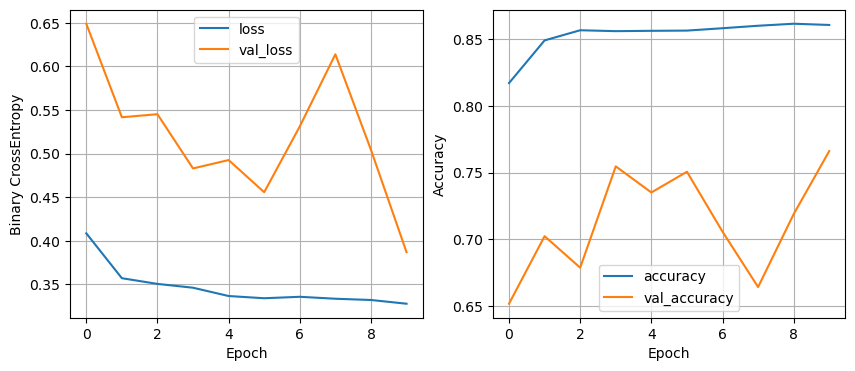

119/119 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8586
64 nodes, dropout: 0.2, lr: 0.01, batch_size: 64


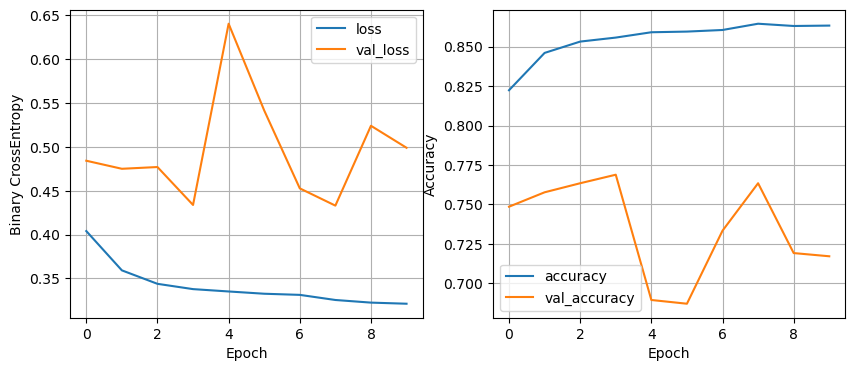

119/119 [==============================] - 0s 4ms/step - loss: 0.3292 - accuracy: 0.8665
64 nodes, dropout: 0.2, lr: 0.005, batch_size: 32


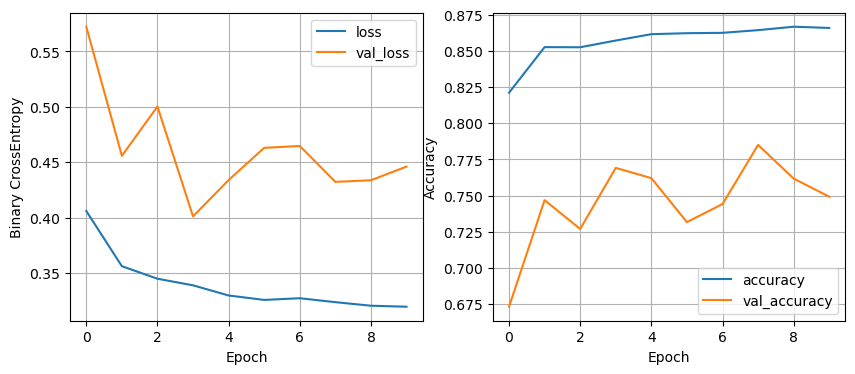

119/119 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8615
64 nodes, dropout: 0.2, lr: 0.005, batch_size: 64


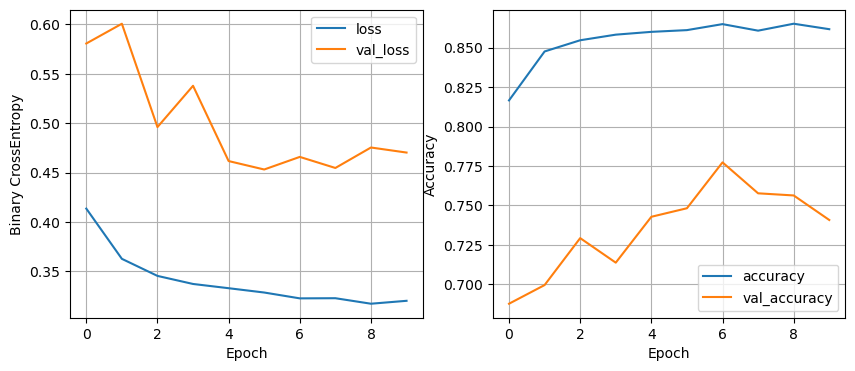

119/119 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8662
64 nodes, dropout: 0.2, lr: 0.001, batch_size: 32


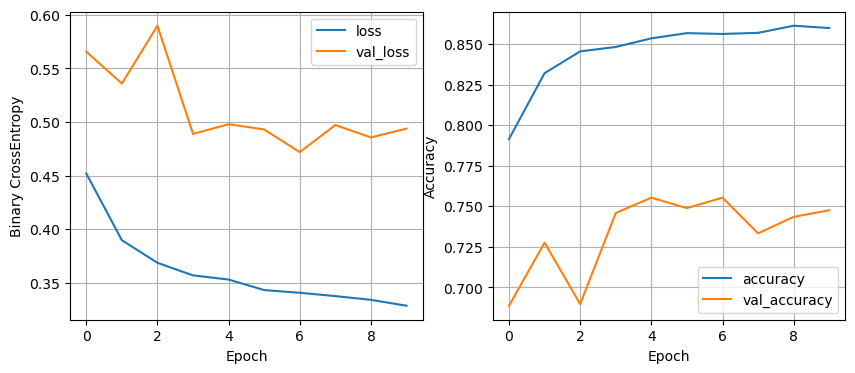

119/119 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8612
64 nodes, dropout: 0.2, lr: 0.001, batch_size: 64


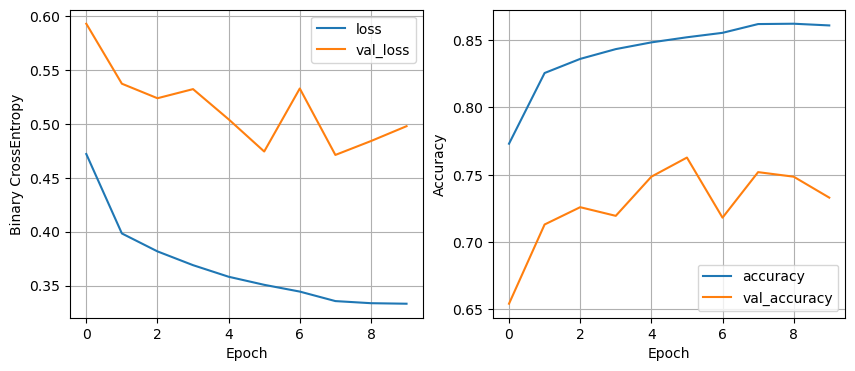

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8604


In [30]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64]:
                print(f"{num_nodes} nodes, dropout: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [34]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 3ms/step


In [35]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1321
           1       0.88      0.93      0.91      2483

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

